<a href="https://colab.research.google.com/github/marro-hub/Customer_Segmentation/blob/basic/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
mydata = pd.read_csv('/content/Mail_Customers.csv')

In [ ]:
mydata.head()

,Gender,Age,Annual Income(birr.),Spending Score(1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
mydata.tail()

,Gender,Age,Annual Income(birr.),Spending Score(1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
mydata.head(2)

,Gender,Age,Annual Income(birr.),Spending Score(1-100)
0,Male,19,15,39
1,Male,21,15,81


In [ ]:
mydata.tail(3)

,Gender,Age,Annual Income(birr.),Spending Score(1-100)
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
mydata.rename(columns={'Annual Income(k$)':'Annual Income(birr.)'}, inplace= True)

In [ ]:
mydata.rename(columns={'Genre':'Gender'}, inplace= True)

In [ ]:
mydata.rename(columns={'Spending Score(1.100)':'Spending Score(1-100)'}, inplace= True)

In [ ]:
mydata.head()

,Gender,Age,Annual Income(birr.),Spending Score(1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
mydata.shape

(5, 4)

In [ ]:
mydata.describe()

,Age,Annual Income(birr.),Spending Score(1-100)
count,5.000000,5.00000,5.000000
mean,22.800000,15.80000,48.600000
std,4.816638,0.83666,30.972569
min,19.000000,15.00000,6.000000
25%,20.000000,15.00000,39.000000
50%,21.000000,16.00000,40.000000
75%,23.000000,16.00000,77.000000
max,31.000000,17.00000,81.000000


In [ ]:
mydata.dtypes

Gender                   object
Age                       int64
Annual Income(birr.)      int64
Spending Score(1-100)     int64
dtype: object

In [ ]:
mydata.isnull().sum()

Gender                   0
Age                      0
Annual Income(birr.)     0
Spending Score(1-100)    0
dtype: int64

Choosing the Annual Income column and spending score column

In [ ]:
#choosing the Annual Income column alone
mydata['Annual Income(birr.)']

0    15
1    15
2    16
3    16
4    17
Name: Annual Income(birr.), dtype: int64

In [ ]:
#choosing the spending score column alone
mydata['Spending Score(1-100)']

0    39
1    81
2     6
3    77
4    40
Name: Spending Score(1-100), dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


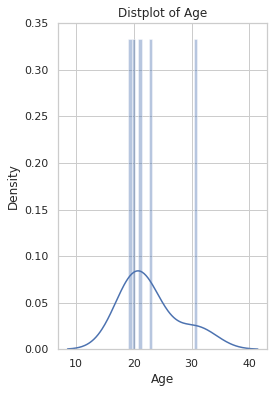

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


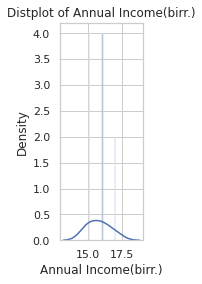

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


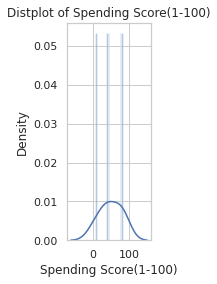

In [ ]:
plt.figure(1, figsize = (15, 6))
n = 0
for x in['Age', 'Annual Income(birr.)', 'Spending Score(1-100)']:
  n += 1
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(mydata[x], bins = 20)
  plt.title('Distplot of {}'.format(x))
  plt.show()

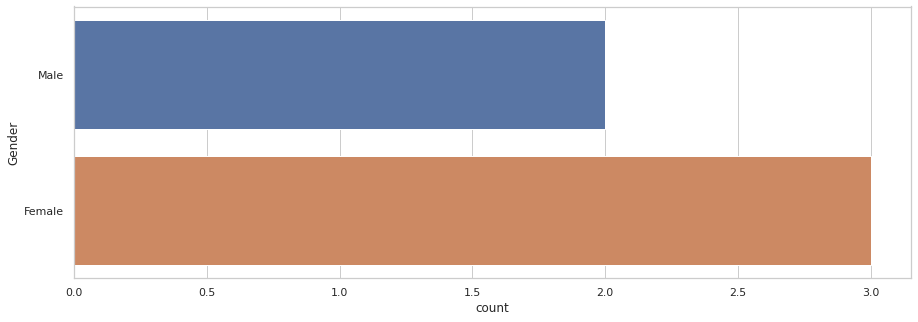

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender', data=mydata)
plt.show()

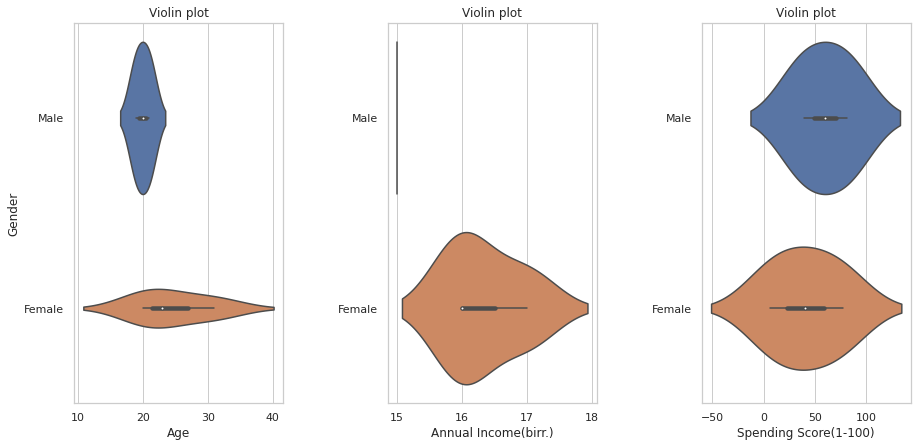

In [ ]:
plt.figure(figsize=(15,7))
n = 0
for cols in['Age', 'Annual Income(birr.)', 'Spending Score(1-100)']:
  n+=1
  plt.subplot(1, 3, n)
  sns.set(style="whitegrid")
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.violinplot(x=cols, y='Gender', data=mydata)
  plt.ylabel('Gender' if n == 1 else '')
  plt.title('Violin plot')
plt.show()

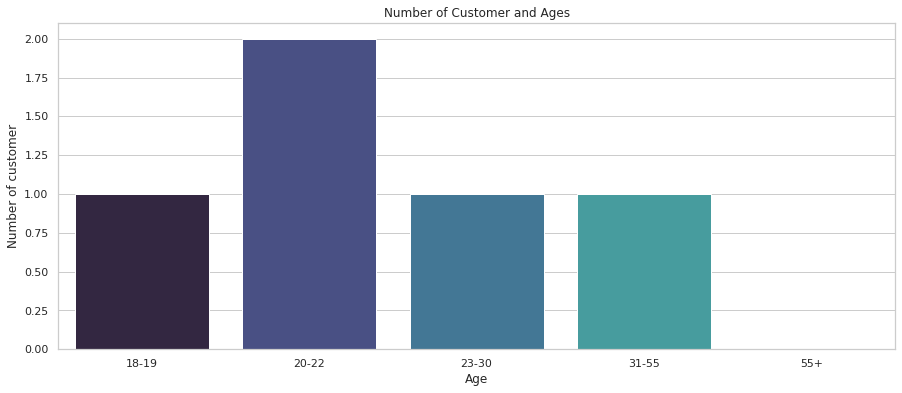

In [ ]:
age_18_19 = mydata.Age[(mydata.Age >= 18) & (mydata.Age <= 19)]
age_20_22 = mydata.Age[(mydata.Age >= 20) & (mydata.Age <= 22)]
age_23_30 = mydata.Age[(mydata.Age >= 23) & (mydata.Age <= 30)]
age_31_55 = mydata.Age[(mydata.Age >= 31) & (mydata.Age <= 55)]
age_55above = mydata.Age[mydata.Age >=56]
agex = ["18-19", "20-22", "23-30", "31-55", "55+"]
agey = [len(age_18_19.values), len(age_20_22.values), len(age_23_30.values), len(age_31_55.values), len(age_55above.values)]
plt.figure(figsize=(15, 6))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of customer")
plt.show()

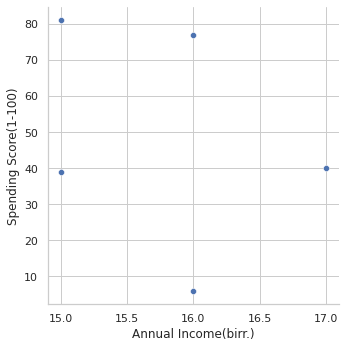

In [ ]:
sns.relplot(x="Annual Income(birr.)", y="Spending Score(1-100)", data=mydata)

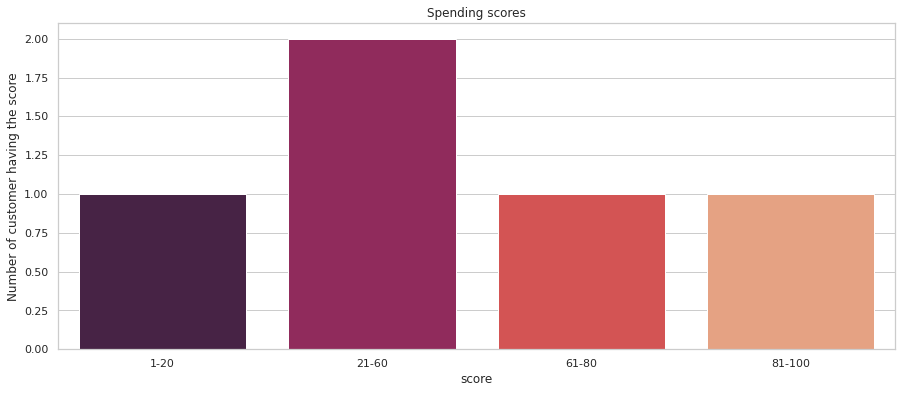

In [ ]:
ss_1_20 = mydata["Spending Score(1-100)"][(mydata["Spending Score(1-100)"] >= 1) & (mydata["Spending Score(1-100)"] <=20)]
ss_21_60 = mydata["Spending Score(1-100)"][(mydata["Spending Score(1-100)"] >= 21) & (mydata["Spending Score(1-100)"] <=60)] 
#ss_41_60 = mydata["Spending Score(1-100)"][(mydata["Spending Score(1-100)"] >= 41) & (mydata["Spending Score(1-100)"] <=60)] 
ss_61_80 = mydata["Spending Score(1-100)"][(mydata["Spending Score(1-100)"] >= 61) & (mydata["Spending Score(1-100)"] <=80)] 
ss_81_100 = mydata["Spending Score(1-100)"][(mydata["Spending Score(1-100)"] >= 81) & (mydata["Spending Score(1-100)"] <=100)] 

ssx = ["1-20", "21-60", "61-80", "81-100"]
ssy = [len(ss_1_20.values), len(ss_21_60.values),len(ss_61_80.values), len(ss_81_100.values)]
plt.figure(figsize=(15, 6))
sns.barplot(x=ssx, y=ssy, palette="rocket")
plt.title("Spending scores")
plt.xlabel("score")
plt.ylabel("Number of customer having the score")
plt.show()

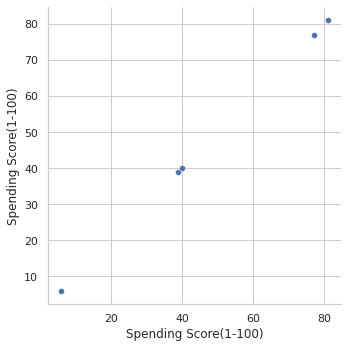

In [ ]:
sns.relplot(x="Spending Score(1-100)", y="Spending Score(1-100)", data=mydata)

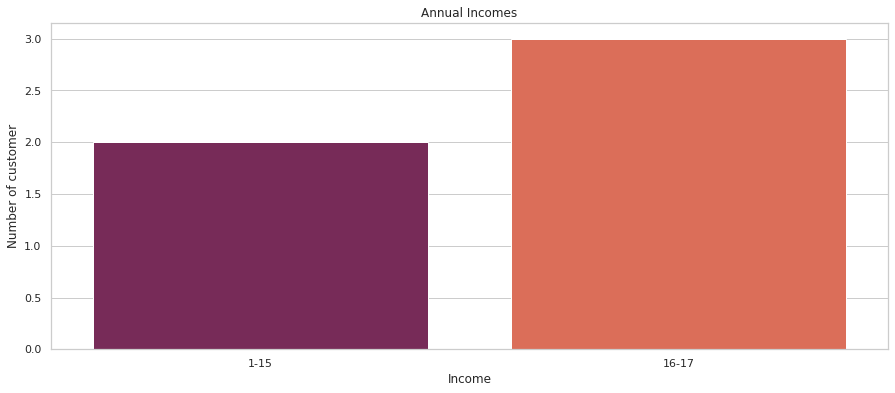

In [ ]:
ai_1_15 = mydata["Annual Income(birr.)"][(mydata["Annual Income(birr.)"] >= 1) & (mydata["Annual Income(birr.)"] <=15)]
ai_16_17 = mydata["Annual Income(birr.)"][(mydata["Annual Income(birr.)"] >= 16) & (mydata["Annual Income(birr.)"] <=17)]  

aix = ["1-15", "16-17"]
aiy = [len(ai_1_15.values), len(ai_16_17.values)]
plt.figure(figsize=(15, 6))
sns.barplot(x=aix, y=aiy, palette="rocket")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of customer")
plt.show()

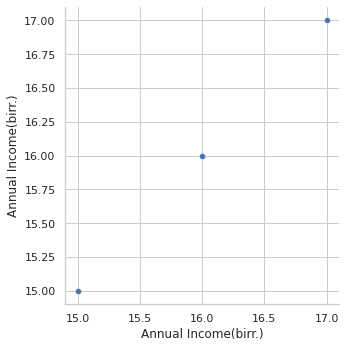

In [ ]:
sns.relplot(x="Annual Income(birr.)", y="Annual Income(birr.)", data=mydata)

In [ ]:
X = mydata.iloc[:,[2,3]].values 
print(X)


[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]
